In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect = True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [9]:

# To view the columns
print("...Measurement...")
m_col = inspector.get_columns('measurement')
for column in m_col:
    print(column["name"], column["type"])
print("...Station...")
s_col = inspector.get_columns('station')
for c in s_col:
     print(c["name"], c["type"])

...Measurement...
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
...Station...
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

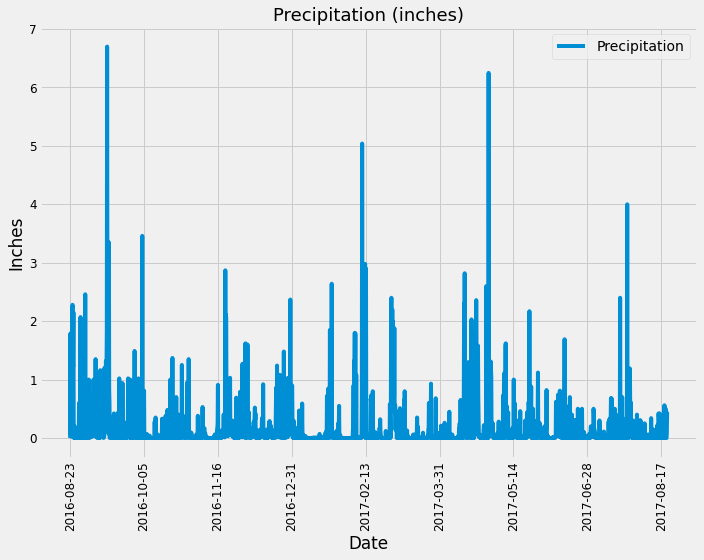

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# converting to date format
last_dt = (dt.datetime.strptime(recent_date, "%Y-%m-%d")).date()
last_dt

# Calculate the date one year from the last date in data set.

oneyearago = last_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
                filter((measurement.date >= oneyearago)\
                & (measurement.date <= last_dt)).all()

# Save the query results as a Pandas DataFrame,set the index to the date column & Sort the dataframe by date

precipitation_df = pd.DataFrame(precipitation, columns=["Date", "Precipitation"]).sort_values("Date").set_index("Date")

#dropping null values
precipitation_df.dropna(axis=0, how="any", inplace=True)
precipitation_df.head()


# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(figsize=(10,8), fontsize=12, rot=90)
plt.title(f"Precipitation (inches)", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.tight_layout()
plt.savefig("Precipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()